# Protoptye of the Simulation with all steps displayed

Day: 0 Stock Price: 723.4437431232132 Pecentage Change: -0.8981173803817657
Day: 1 Stock Price: 742.0828156631055 Pecentage Change: 2.5764370370285827
Day: 2 Stock Price: 722.5588047460285 Pecentage Change: -2.630974670883721
Day: 3 Stock Price: 726.9225315734888 Pecentage Change: 0.603926877480098
Day: 4 Stock Price: 690.1473964039744 Pecentage Change: -5.059017099100123

########### RED DAY !!! BUY !!!
Bought 3 stocks for the cost 2070.4421892119235


Day: 5 Stock Price: 673.5119594815275 Pecentage Change: -2.410417978699365
Day: 6 Stock Price: 708.3011407080222 Pecentage Change: 5.165339788958696
Day: 7 Stock Price: 716.9031470278009 Pecentage Change: 1.2144560873048997
Day: 8 Stock Price: 737.0237678958969 Pecentage Change: 2.8066023913430667
Day: 9 Stock Price: 754.4418310307557 Pecentage Change: 2.3632973444784664
Day: 10 Stock Price: 737.1391537247673 Pecentage Change: -2.2934408716903505
Day: 11 Stock Price: 786.5039976230943 Pecentage Change: 6.696814793907795
Day: 12 Stock Pr

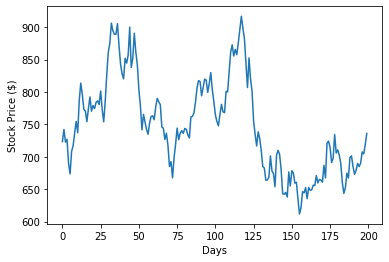

In [2]:
import random
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile


initial_stocks=0 #initial number of stocks in the portfolio
stock_price=730   #initial stock price
portfolio=0      #set portfolio to zero initially
cost=0           #set cost to zero
total_days=200   #total days to simulate
price_history=np.zeros(total_days)     #array to store price history for each day
days=np.arange(0,total_days,1)         #array to store the days
precentage_change=np.zeros(total_days) #array to store the percentage change in each day
portfolio=np.zeros(total_days)         # array to store the number of stocks in the portfolio in each day
add_portfolio=0                        #counter to count the number of stocks added in the portfolio

for i in range(total_days):
    dp=np.random.normal(0.035814462652301864,2.9139242695957,1)[0]
    '''pick a random number for percentage change with normal distribution 
    for given mean and standard deviation
    '''
    precentage_change[i]=dp     
    #store the percentage change of each day in the array 
    stock_price=stock_price+(stock_price*dp*0.01)  
    #calculate and change the stock price based on percentage change
    price_history[i]=stock_price  
    #store the stock price in price history
    print(f"Day: {i} Stock Price: {stock_price} Pecentage Change: {dp}")
    if dp<-5:    
        #buy 3 stocks everytime when the closing price is less than 5% of the last day
        print("\n########### RED DAY !!! BUY !!!")
        buy=3    
        #no of stocks to buy
        cost+=buy*stock_price  
        #cost paid to buy the stocks at the stock_price
        print(f"Bought {buy} stocks for the cost {cost}\n\n")
        add_portfolio+=3
    portfolio[i]=add_portfolio
    
stocks_owned=np.max(portfolio)
print("\n\nTotal stocks bought",stocks_owned)
print("Total cost",cost)
cost_basis=cost/stocks_owned
print(f"Cost per stock ={cost_basis}")
print("Current stock price:",stock_price)
profit=(stocks_owned*stock_price)-cost
print("Profit Made:",profit)
profit_p=profit/cost*100
print("Profit Percentage:",profit_p)

plt.plot(days,price_history)
plt.xlabel("Days")
plt.ylabel("Stock Price ($)")
df = pd.DataFrame({'Day':days,'Closing_Price':price_history,'Percentage_Change':precentage_change,"Portfolio":portfolio})

writer = ExcelWriter('simulated_stock_data_sample.xlsx')
df.to_excel(writer,'Sheet1',index=False)
writer.save()